In [29]:
#import folium
import os
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

processed_data_dir = os.getcwd().replace('/notebooks', '') + '/data/processed'
img_data_dir = os.getcwd().replace('/notebooks', '') + '/static/images'
test_set_df = pd.read_csv("{}/step4_full_test_dataset.csv".format(processed_data_dir))

# this assumes same distribution of the school took the test. 
# Probably not exactly accurate, but absent more granular data, it will have to do
test_set_df["predicted_testtakers_all"] = test_set_df["predicted_perc_testtakers"].astype(float) * test_set_df["grade_8_2017_enrollment"].astype(float)
test_set_df["predicted_testtakers_black_hispanic"] = test_set_df["predicted_testtakers_all"].astype(float) * test_set_df["Percent Black / Hispanic"].astype(float)
test_set_df["predicted_testtakers_below_poverty_lvl"] = test_set_df["predicted_testtakers_all"].astype(float) * test_set_df["pct_poverty_2017_val"].astype(float)
test_set_df["actual_testtakers_black_hispanic"] = test_set_df["num_testtakers"].astype(float) * test_set_df["Percent Black / Hispanic"].astype(float)
test_set_df["actual_testtakers_below_poverty_lvl"] = test_set_df["num_testtakers"].astype(float) * test_set_df["pct_poverty_2017_val"].astype(float)
test_set_df["diff_num_testtakers_all"] =  test_set_df["predicted_testtakers_all"] - test_set_df["num_testtakers"]
test_set_df["diff_num_testtakers_black_hispanic"] = test_set_df["predicted_testtakers_black_hispanic"] - test_set_df["actual_testtakers_black_hispanic"] 
test_set_df["diff_num_testtakers_below_poverty_lvl"] = test_set_df["predicted_testtakers_below_poverty_lvl"] - test_set_df["actual_testtakers_below_poverty_lvl"] 
test_set_df["percentile_diff_num_testtakers_all"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_all"], row["diff_num_testtakers_all"])) / float(100), axis=1)
test_set_df["percentile_diff_num_black_hispanic"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_black_hispanic"], row["diff_num_testtakers_black_hispanic"])) / float(100), axis=1)
test_set_df["percentile_diff_num_below_poverty_lvl"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_black_hispanic"], row["diff_num_testtakers_below_poverty_lvl"])) / float(100), axis=1)

test_set_df["positive_diff_num_testtakers"] = test_set_df.apply(lambda row: True if row["diff_num_testtakers_all"] > 0 else False, axis=1)
test_set_df["addtl_testtakers_label"] = test_set_df.apply(lambda row: "{}: {} {} testtakers predicted".format(row["school_name"], int(row["diff_num_testtakers_all"]), "fewer" if int(row["diff_num_testtakers_all"]) < 0 else "additional") , axis=1)

new_int_cols = ["predicted_testtakers_all", "predicted_testtakers_black_hispanic", \
    "predicted_testtakers_below_poverty_lvl", "actual_testtakers_black_hispanic", \
    "actual_testtakers_below_poverty_lvl", "diff_num_testtakers_all", \
    "diff_num_testtakers_black_hispanic", "diff_num_testtakers_below_poverty_lvl"
] 
test_set_df[new_int_cols] = test_set_df[new_int_cols].astype(int)
test_set_df.to_csv("{}/step5_full_processed_test_dataset.csv".format(processed_data_dir), index=False)

In [8]:

# nyc_img=mpimg.imread('{}/cropped_neighbourhoods_new_york_city_map.png'.format(img_data_dir))
# test_set_df[test_set_df["positive_diff_num_testtakers"] == True].plot(kind="scatter", 
#     x="Longitude", 
#     y="Latitude", 
#     #c=test_set_df["percentile_diff_num_testtakers_all"].astype(float) * 50, 
#     s=test_set_df["predicted_testtakers_black_hispanic"].astype(float) * 5, 
#     #cmap=plt.get_cmap("jet"), 
#     #colorbar=True,
#     figsize=(11,10),
#     alpha=0.4           
#                 )
# plt.imshow(nyc_img, 
#            #extent=[test_set_df["Longitude"].min(), test_set_df["Longitude"].max(), test_set_df["Latitude"].min(), test_set_df["Latitude"].max()], 
#            extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01]
#            ,alpha = 0.5)
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/greg.bolla/Desktop/git-projects/kaggle-passnyc/static/images/neighbourhoods_new_york_city_map.png'

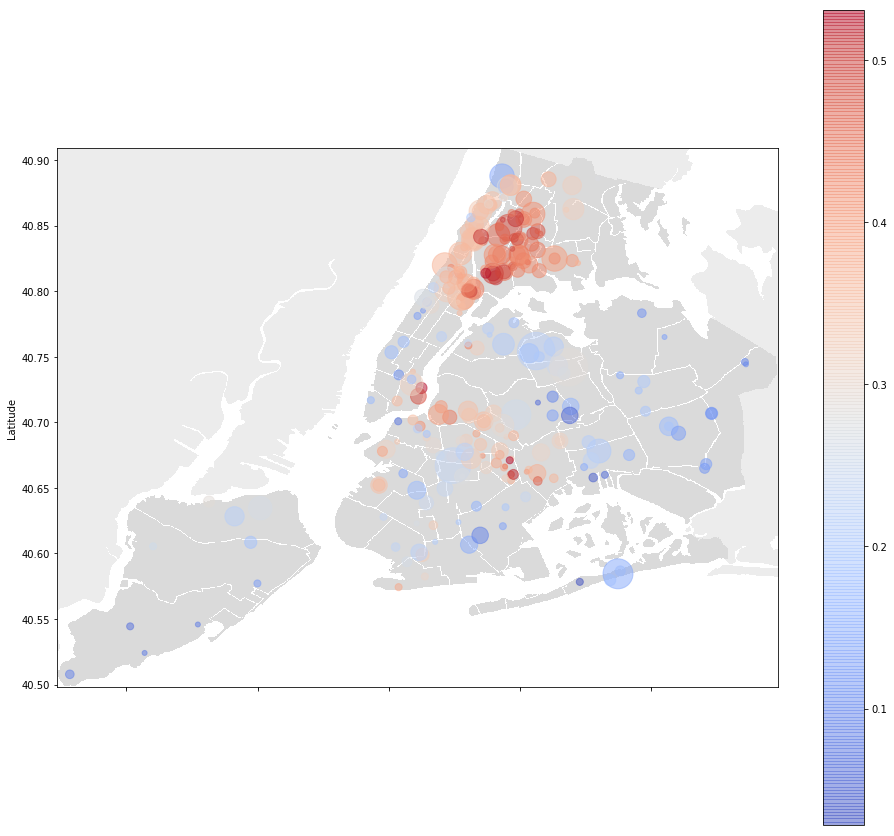

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nyc_img=mpimg.imread('{}/cropped_neighbourhoods_new_york_city_map.png'.format(img_data_dir))

pos_test_set_df = test_set_df[test_set_df["positive_diff_num_testtakers"] == True]
neg_test_set_df = test_set_df[test_set_df["positive_diff_num_testtakers"] == True]
pos_test_set_df.plot(kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    c=pos_test_set_df["pct_poverty_2017_val"].astype(float), 
    s=pos_test_set_df["diff_num_testtakers_black_hispanic"].astype(float) * 25, 
    cmap=plt.get_cmap("coolwarm"), 
    #colorbar=True,''
    figsize=(16.162,15),
    alpha=0.5       
                )
plt.imshow(nyc_img, 
           extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01], 
           alpha = 0.25)
plt.show()

#https://www.kaggle.com/randylaosat/simple-exploratory-data-analysis-passnyc

In [31]:
import mpld3
neg_test_set_df = test_set_df[test_set_df["positive_diff_num_testtakers"] == False]
neg_test_set_df.plot(kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    c=neg_test_set_df["pct_poverty_2017_val"].astype(float), 
    s=abs(neg_test_set_df["diff_num_testtakers_black_hispanic"].astype(float)) * 25, 
    cmap=plt.get_cmap("coolwarm"), 
    colorbar=True,
    figsize=(16.162,15),
    alpha=0.5       
                )
plt.imshow(nyc_img, 
           extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01], 
           alpha = 0.25)
labels = ['point {}'.format(i+1) for i in range(len(neg_test_set_df))]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
plt.show()

ModuleNotFoundError: No module named 'mpld3'

In [32]:
### PLOTLY
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py
#plotly.tools.set_credentials_file(username='b-o-l-l-a', api_key='ZEb3sARCXoEiHzXQaBKa')

pos_data = [
    {
        'x': pos_test_set_df["Longitude"],
        'y': pos_test_set_df["Latitude"],
        'text': pos_test_set_df["addtl_testtakers_label"],
        'mode': 'markers',
        'marker': {
            'color': pos_test_set_df["pct_poverty_2017_val"].astype(float),
            'size': pos_test_set_df["diff_num_testtakers_black_hispanic"].astype(float) *1.2 ,
            'showscale': True,
            'colorscale':'RdBu',
            'opacity':0.5
        }
    }
]
nyc_img=mpimg.imread('{}/cropped_neighbourhoods_new_york_city_map.png'.format(img_data_dir))
layout= go.Layout(
    autosize=False,
    width=900,
    height=600,
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    ))
fig=go.Figure(data=pos_data,layout=layout)
py.iplot(fig, filename='scatter_hover_labels')


ModuleNotFoundError: No module named 'plotly'

No handles with labels found to put in legend.


99


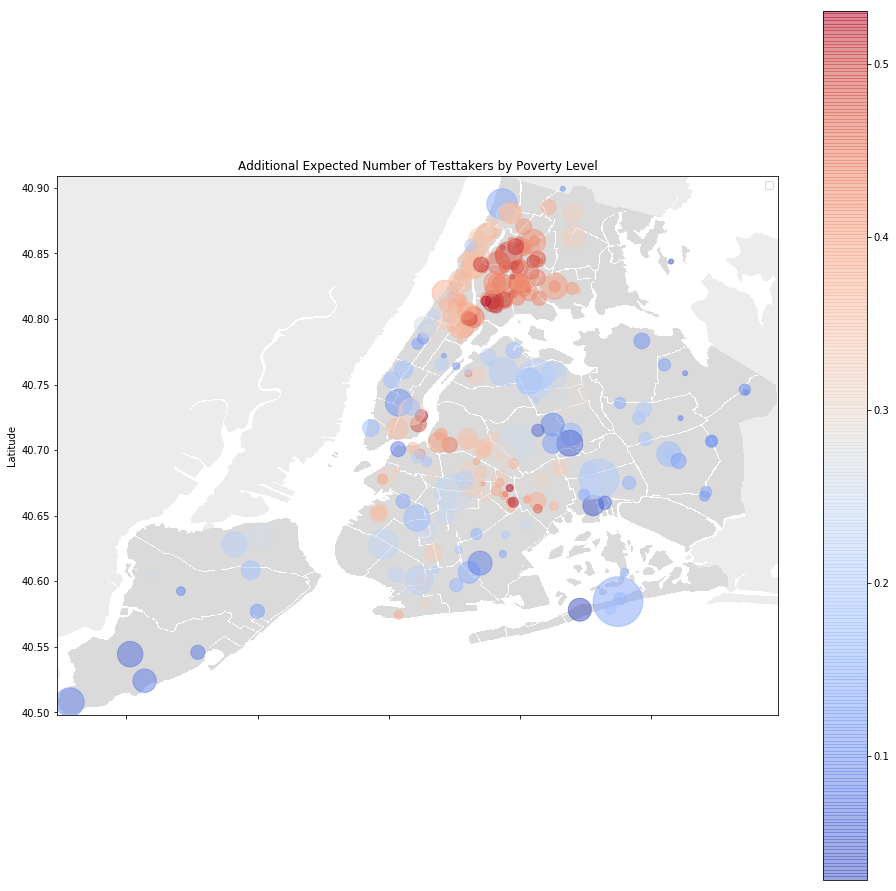

In [28]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(pos_test_set_df["diff_num_testtakers_all"].max())
nyc_img=mpimg.imread('{}/cropped_neighbourhoods_new_york_city_map.png'.format(img_data_dir))

pos_test_set_df = test_set_df[test_set_df["positive_diff_num_testtakers"] == True]
neg_test_set_df = test_set_df[test_set_df["positive_diff_num_testtakers"] == True]
pos_test_set_df.plot(kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    c=pos_test_set_df["pct_poverty_2017_val"].astype(float), 
    s=pos_test_set_df["diff_num_testtakers_all"].astype(float) * 25, 
    cmap=plt.get_cmap("coolwarm"), 
    title='Additional Expected Number of Testtakers by Poverty Level',
    figsize=(16.162,16),
    alpha=0.5)
plt.imshow(nyc_img, 
           extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01], 
           alpha = 0.25)
plt.legend()
plt.show()

In [90]:
import matplotlib
import numpy as np
coolwarm_cmap = matplotlib.cm.get_cmap('coolwarm')
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
coolwarm_rgb = []
for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(coolwarm_cmap(norm(i)))
       coolwarm_rgb.append(k)

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

coolwarm = matplotlib_to_plotly(coolwarm_cmap, 255)

TypeError: 'map' object is not subscriptable

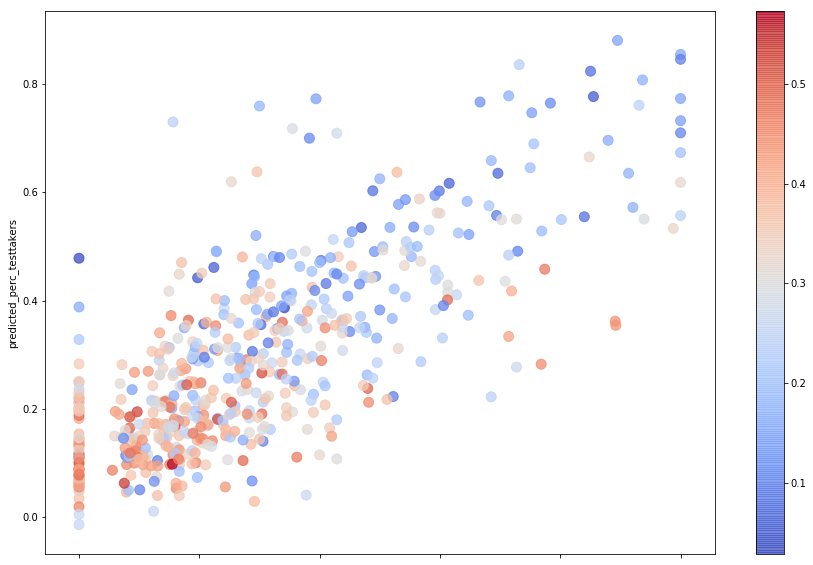

In [91]:
pred_actual_scatter = test_set_df.plot(kind="scatter", 
    x="perc_testtakers", 
    y="predicted_perc_testtakers",
    c=test_set_df["pct_poverty_2017_val"].astype(float),
    cmap=plt.get_cmap("coolwarm"), 
    s=100,
    colorbar=True,
    alpha=0.75 ,
    figsize=(15,10))
